# Figure 6f. Manhattan plot of variant level MaxVCP from ColocBoost.

Manhattan plot of variant level MaxVCP from ColocBoost, with labeled genes containing variants with MaxVCP>0.5 and highlighting microglia contributions (green).

*Note*: we only include the information for the colocalized variants in 95% CoS from both ColocBoost and COLOC for this reproducable purpose. 

In [4]:
data <- readRDS("data/Figure_6f.rds")
don <- data$don
axisdf <- data$axisdf
anno_info <- data$anno_info
library(ggplot2)
library(ggrepel)
p1 <- ggplot(don, aes(x=BPcum, y=VCP)) +
  
  # Show all points
  geom_point( aes(color=as.factor(CHR)), alpha=0.8, size=1.6) +
  scale_color_manual(values = rep(c("#2166AC", "#92C5DE"), 22 )) +
  geom_hline(yintercept = 0.5, linetype = "dashed", color = "red", linewidth = 1) +
  # annotate("text", x = 600000, y = 0.53, label = "maxVCP=0.5", color = "red", size = 5, hjust = 1) +
  
  # custom X axis:
  scale_x_continuous( label = axisdf$CHR, breaks= axisdf$center ) +
  scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
  
  labs(title = "",  x = "", y = "maxVCP", fill = "") +
  ylim(0, 1.02) +
  
  # Add highlighted points
  geom_point(data=subset(don, VCP>=0.5), color="orange", size=2) +
  
  # Add label using ggrepel to avoid overlapping
  geom_label_repel(data = anno_info, aes(label = Gene, fill = micgroup), 
                   size = 5, force = 20, force_pull = 0.5, 
                   box.padding = 0.5, max.overlaps = 20, color = "black") +
  scale_fill_manual(values = c("FALSE" = scales::alpha("#F39B7F", 0.5), "TRUE" = scales::alpha("#79AF97FF", 0.5)) ) +
  theme_minimal(base_size = 15) +
  theme( 
    axis.text.x = element_text(size = 22, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 22),
    axis.title.y = element_text(size = 28),
    legend.position="none",
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, linewidth = 1.5)
  ) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


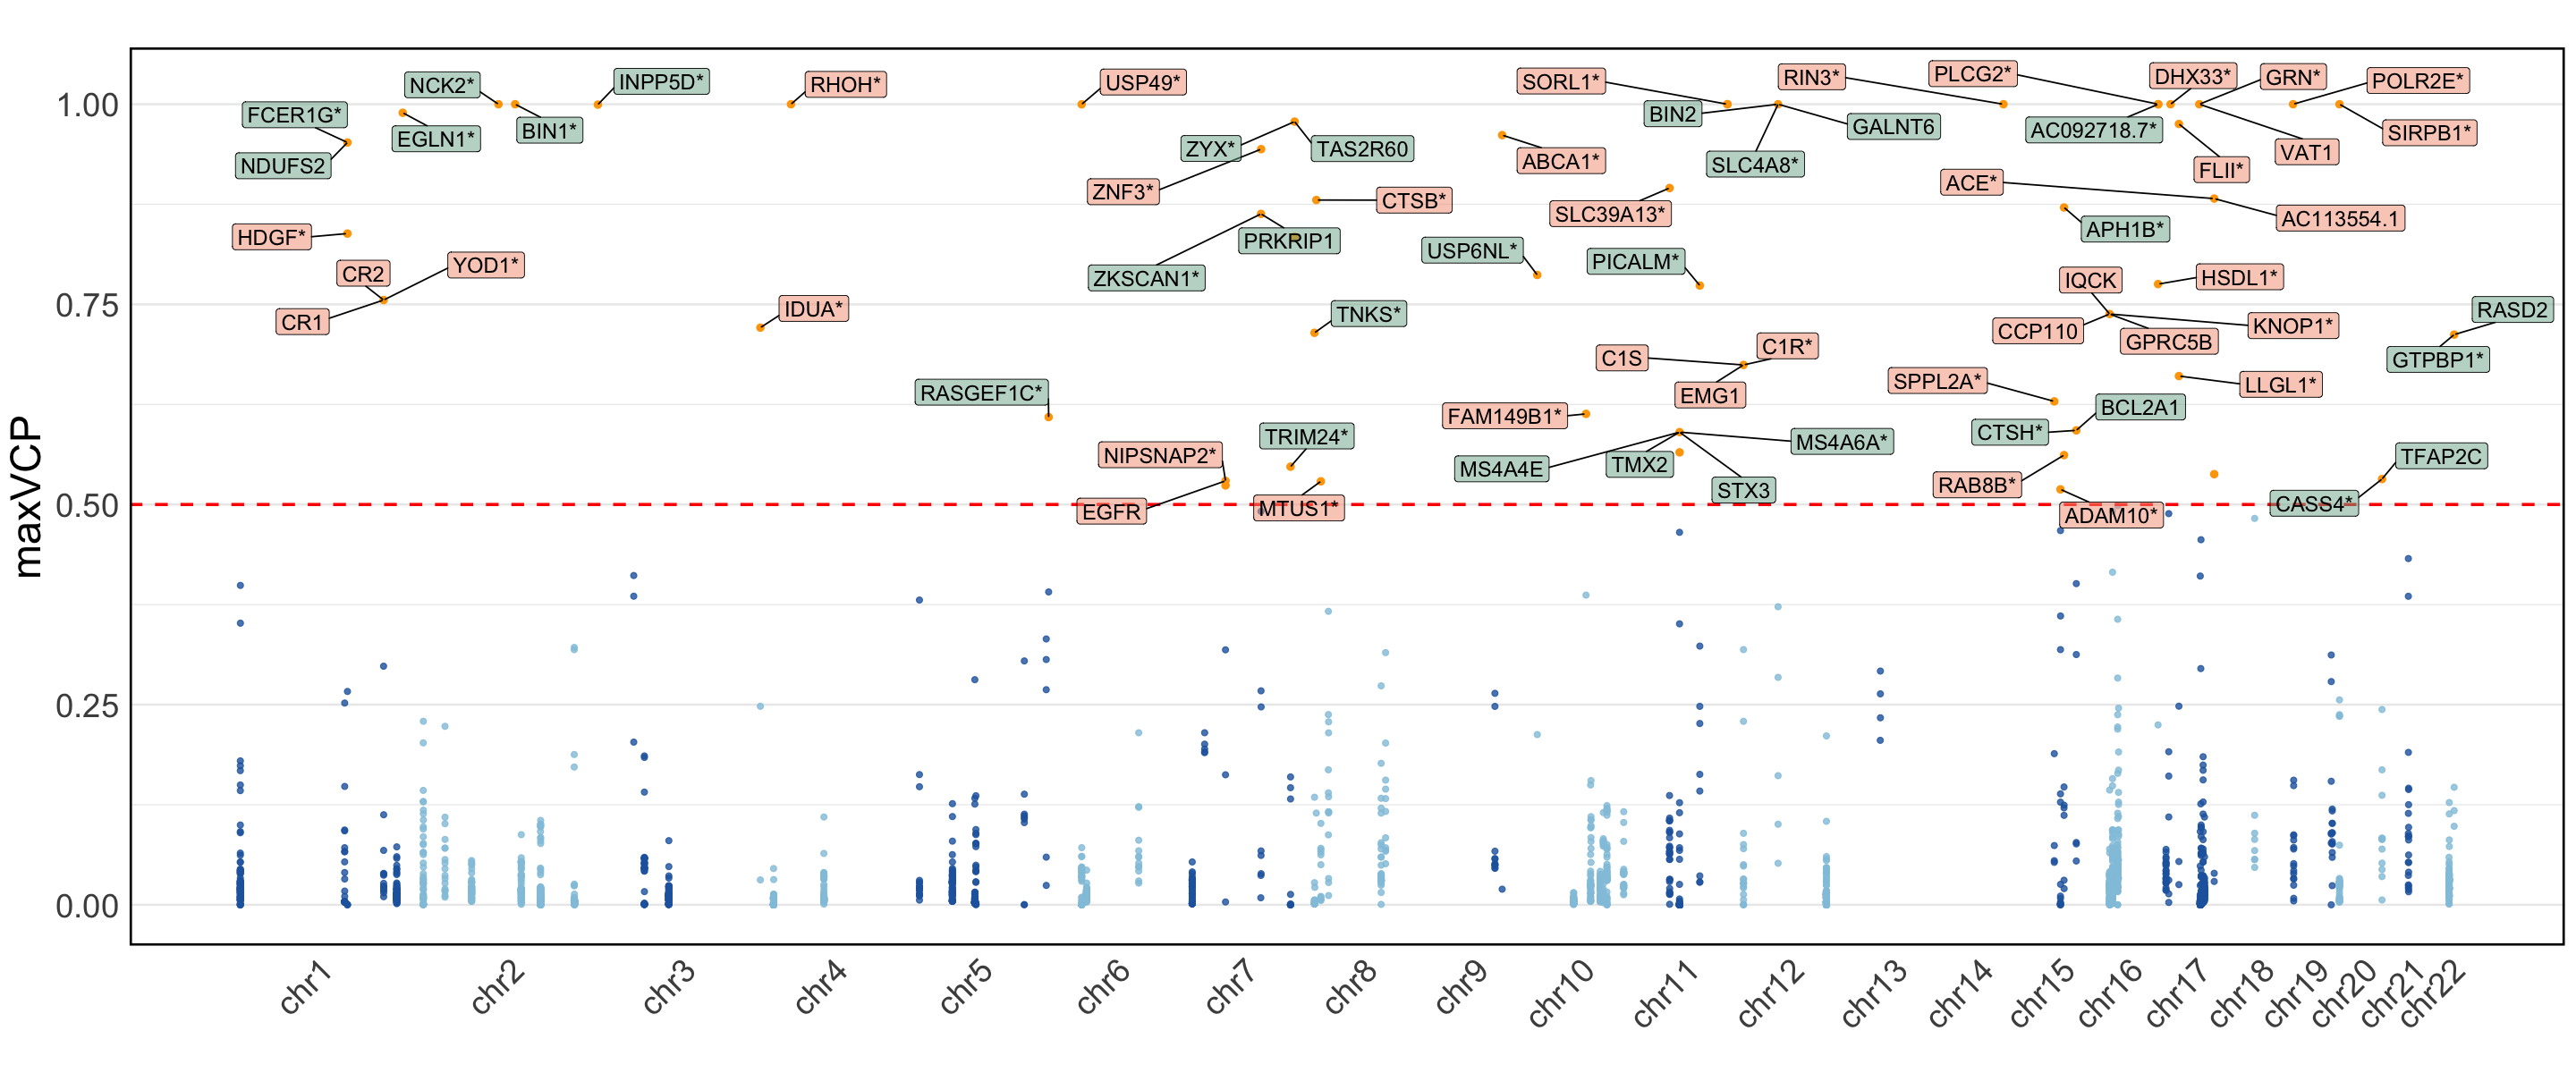

In [6]:
options(repr.plot.width = 24, repr.plot.height = 10)
p1